In [1]:
# https://www.lfd.uci.edu/~gohlke/pythonlibs/
# this link is for installing specific library 

In [2]:
# cd: change the directory 
# the directory needs a quotation mark 
# there is no need the quatation mark for the file

In [3]:
# https://github.com/datadotworld/data.world-py
# this is to install the dataworld module

In [4]:
# dataworld, setting, go to advanced, get the API token 

In [5]:
# we are going to turn the covid-19 data into a geo data frame as covid-19 data is not a geo dataframe but the standard pandas dataframe 
# we want to be able to transform the covid-19 data which is time series to do dataframe using the shape file import 

In [6]:
#first step 
import numpy as np
import pandas as pd
import geopandas
import datetime

import datadotworld as dw

# we download the covid data  using dataworld 
def import_covid_data(FIPS_name):
    # Load COVID19 which is county data using datadotworld API
    # Data provided by John Hopkins, file provided 
    # by Associated Press
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    
    #the dataset includes multiple dataframes. We will oselct #2 from the lsit 
    covid_data = dataset.dataframes[
        "2_cases_and_deaths_by_county_timeseries"]
    # narrow down the dataset by the fipps number 
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    return covid_data

In [7]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
# save our covid data and all the steps are in this import covid data function 
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\Shane\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [8]:
covid_data

uid location_type  fips_code location_name    state        date  \
23760   84001001        county     1001.0       Autauga  Alabama  2020-01-22   
23761   84001001        county     1001.0       Autauga  Alabama  2020-01-23   
23762   84001001        county     1001.0       Autauga  Alabama  2020-01-24   
23763   84001001        county     1001.0       Autauga  Alabama  2020-01-25   
23764   84001001        county     1001.0       Autauga  Alabama  2020-01-26   
...          ...           ...        ...           ...      ...         ...   
956929  84056045        county    56045.0        Weston  Wyoming  2020-11-09   
956930  84056045        county    56045.0        Weston  Wyoming  2020-11-10   
956931  84056045        county    56045.0        Weston  Wyoming  2020-11-11   
956932  84056045        county    56045.0        Weston  Wyoming  2020-11-12   
956933  84056045        county    56045.0        Weston  Wyoming  2020-11-13   

        total_population  cumulative_cases  cumulative_cases_per_100_000  \
23760            55200.0                 0                          0.00   
23761            55200.0                 0                          0.00   
23762            55200.0                 0                          0.00   
23763            55200.0                 0                          0.00   
23764            55200.0                 0                          0.00   
...                  ...               ...                           ...   
956929            7100.0               310                       4366.20   
956930            7100.0               321                       4521.13   
956931            7100.0               323                       4549.30   
956932            7100.0               321                       4521.13   
956933            7100.0               330                       4647.89   

        cumulative_deaths  cumulative_deaths_per_100_000  new_cases  \
23760                   0                            0.0        NaN   
23761                   0                            0.0        0.0   
23762                   0                            0.0        0.0   
23763                   0                            0.0        0.0   
23764                   0                            0.0        0.0   
...                   ...                            ...        ...   
956929                  0                            0.0        4.0   
956930                  0                            0.0       11.0   
956931                  0                            0.0        2.0   
956932                  0                            0.0       -2.0   
956933                  0                            0.0        9.0   

        new_deaths  new_cases_per_100_000  new_deaths_per_100_000  \
23760          NaN                    NaN                     NaN   
23761          0.0                   0.00                     0.0   
23762          0.0                   0.00                     0.0   
23763          0.0                   0.00                     0.0   
23764          0.0                   0.00                     0.0   
...            ...                    ...                     ...   
956929         0.0                  56.34                     0.0   
956930         0.0                 154.93                     0.0   
956931         0.0                  28.17                     0.0   
956932         0.0                 -28.17                     0.0   
956933         0.0                 126.76                     0.0   

        new_cases_7_day_rolling_avg  new_deaths_7_day_rolling_avg  
23760                           NaN                           NaN  
23761                           NaN                           NaN  
23762                           NaN                           NaN  
23763                           NaN                           NaN  
23764                           NaN                           NaN  
...                             ...              

In [9]:
# learn how to intepret the time series data from Dr. Caton's artile 
# https://www.ndsu.edu/centers/pcpe/news/detail/58432/
# we use per capita or per hundred thousand or more per million
# we take data per person in the state not comparing the observed levels without normalizing by population 

In [10]:
# one mistake we should avoid is that people will log the rates, not just people. 
# financial times consitently presents rates on a log to accesss which totally skews presentation 
# Because if you are presenting rates, logging your access to be supposed to make it so that the slope of your lines indicate the rates

In [11]:
# transform the fips into integers 


In [ ]:
import numpy as np
import pandas as pd
import geopandas
import datetime

import datadotworld as dw

# we download the covid data  using dataworld 
def import_covid_data(FIPS_name):
    # Load COVID19 which is county data using datadotworld API
    # Data provided by John Hopkins, file provided 
    # by Associated Press
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    
    #the dataset includes multiple dataframes. We will oselct #2 from the lsit 
    covid_data = dataset.dataframes[
        "2_cases_and_deaths_by_county_timeseries"]
    # narrow down the dataset by the fipps number 
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    
    # turn from floats to integers
    # save the integers, in the very same column, so that the new column will be inttegers, replacing the old flots
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
     
    # set the index, the index makes it easier to get access the data for pandas to interpret the dataframe 
    # in place means being saved 
    covid_data.set_index([FIPS_name, "date"], inplace = True) 
    
    # Prepare a column for state abbreviations. we will draw these 
    # from state_dict
    # we initialize the column and we make a bunch of blank strings because we want to be strings that save the abbreviates of the strings
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        #.loc[row(s), col]
        # call covid data for all the rows wehre the state equals whatever the state, enter the value of understate abbreviations for those rows
        covid_data.loc[
            covid_data["state"] == state, "state_abr"] = abr
    # save location name as Cass, ND 
    # save the county comma state abbreviation 
    covid_data["Location"] = covid_data["location_name"] + ", " +\
        covid_data["state_abr"]
    return covid_data

# we import the geographic data as well. 
def import_geo_data(filename, index_col = "Date", 
                    FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename, 
                                  index_col = index_col)
    map_data.rename(columns = {"State":"state"},
                   inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the
    # state separately
    # they are not together, we make the state and county fips and concatenate them as strings 
    # and they will turn back into integers 
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

# we create a dictionary linking the state names with the state abbreviations 
# we are going to use a more conveniently name and refer to data
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 
    'Wyoming': 'WY'}


In [13]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
# save our covid data and all the steps are in this inport covid data function 
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\Shane\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [14]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2020-11-09  84056045        county        Weston  Wyoming   
          2020-11-10  84056045        county        Weston  Wyoming   
          2020-11-11  84056045        county        Weston  Wyoming   
          2020-11-12  84056045        county        Weston  Wyoming   
          2020-11-13  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2020-11-09            7100.0               310   
          2020-11-10            7100.0               321   
          2020-11-11            7100.0               323   
          2020-11-12            7100.0               321   
          2020-11-13            7100.0               330   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2020-11-09                       4366.20                  0   
          2020-11-10                       4521.13                  0   
          2020-11-11                       4549.30                  0   
          2020-11-12                       4521.13                  0   
          2020-11-13                       4647.89                  0   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                            0.0        NaN         NaN   
          2020-01-23                            0.0        0.0         0.0   
          2020-01-24                            0.0        0.0         0.0   
          2020-01-25                            0.0        0.0         0.0   
          2020-01-26                            0.0        0.0         0.0   
...                                             ...        ...         ...   
56045     2020-11-09                            0.0        4.0         0.0   
          2020-11-10                            0.0       11.0         0.0   
          2020-11-11                            0.0        2.0         0.0   
          2020-11-12                            0.0       -2.0         0.0   
          2020-11-13                            0.0        9.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [15]:
# FIPS codes are numbers which uniquely identify geographic areas. 
# The number of digits in FIPS codes vary depending on the level of geography. 
# State-level FIPS codes have two digits, county-level FIPS codes have five digits of which the first two are the FIPS code of the state to which the county belongs.

In [16]:
# it is possible to have a picture in picture on the map

In [17]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
# save our covid data and all the steps are in this inport covid data function 
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\Shane\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [18]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2020-11-09  84056045        county        Weston  Wyoming   
          2020-11-10  84056045        county        Weston  Wyoming   
          2020-11-11  84056045        county        Weston  Wyoming   
          2020-11-12  84056045        county        Weston  Wyoming   
          2020-11-13  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2020-11-09            7100.0               310   
          2020-11-10            7100.0               321   
          2020-11-11            7100.0               323   
          2020-11-12            7100.0               321   
          2020-11-13            7100.0               330   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2020-11-09                       4366.20                  0   
          2020-11-10                       4521.13                  0   
          2020-11-11                       4549.30                  0   
          2020-11-12                       4521.13                  0   
          2020-11-13                       4647.89                  0   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                            0.0        NaN         NaN   
          2020-01-23                            0.0        0.0         0.0   
          2020-01-24                            0.0        0.0         0.0   
          2020-01-25                            0.0        0.0         0.0   
          2020-01-26                            0.0        0.0         0.0   
...                                             ...        ...         ...   
56045     2020-11-09                            0.0        4.0         0.0   
          2020-11-10                            0.0       11.0         0.0   
          2020-11-11                            0.0        2.0         0.0   
          2020-11-12                            0.0       -2.0         0.0   
          2020-11-13                            0.0        9.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [19]:
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)

In [20]:
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
fips_code                                                               
21007           21      007  00516850  0500000US21007    Ballard   06   
21017           21      017  00516855  0500000US21017    Bourbon   06   
21031           21      031  00516862  0500000US21031     Butler   06   
21065           21      065  00516879  0500000US21065     Estill   06   
21069           21      069  00516881  0500000US21069    Fleming   06   
...            ...      ...       ...             ...        ...  ...   
31073           31      073  00835858  0500000US31073     Gosper   06   
39075           39      075  01074050  0500000US39075     Holmes   06   
48171           48      171  01383871  0500000US48171  Gillespie   06   
55079           55      079  01581100  0500000US55079  Milwaukee   06   
26139           26      139  01623012  0500000US26139     Ottawa   06   

                ALAND      AWATER  Population      state  \
fips_code                                                  
21007       639387454    69473325      7888.0   Kentucky   
21017       750439351     4829777     19788.0   Kentucky   
21031      1103571974    13943044     12879.0   Kentucky   
21065       655509930     6516335     14106.0   Kentucky   
21069       902727151     7182793     14581.0   Kentucky   
...               ...         ...         ...        ...   
31073      1186616237    11831826      1990.0   Nebraska   
39075      1094405866     3695230     43960.0       Ohio   
48171      2740719114     9012764     26988.0      Texas   
55079       625440563  2455383635    945726.0  Wisconsin   
26139      1459502408  2765830983    291830.0   Michigan   

                                                    geometry  
fips_code                                                     
21007      POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
21017      POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
21031      POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
21065      POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
21069      POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                      ...  
31073      POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
39075      POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
48171      POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
55079      POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
26139      POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3142 rows x 11 columns]

In [21]:
print(map_data.loc[38017, "geometry"])

POLYGON ((-97.70617899999999 46.99106399999999, -97.706013 46.992298, -97.70553699999999 47.065541, -97.705535 47.080119, -97.70568399999999 47.15275399999999, -97.705552 47.179476, -97.70572199999999 47.181704, -97.706034 47.239978, -97.68533099999999 47.239829, -97.578408 47.23901799999999, -97.49406499999999 47.239233, -97.482708 47.239263, -97.45151199999999 47.239061, -97.32446399999999 47.238755, -97.30376799999999 47.23862, -97.21766 47.23875899999999, -97.197006 47.238801, -97.13403699999999 47.238793, -97.12424299999999 47.238783, -97.11264199999999 47.238783, -97.101708 47.23877299999999, -97.070137 47.238779, -97.007018 47.238777, -97.003299 47.23878999999999, -97.002692 47.238861, -97.00198899999999 47.238797, -96.998364 47.23881, -96.94309799999999 47.23878699999999, -96.900397 47.238297, -96.84706799999999 47.237732, -96.83327850519149 47.2382080185729, -96.83240780714328 47.2376111364146, -96.830838 47.236535, -96.82887799999999 47.234248, -96.828948 47.232155, -96.82995

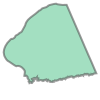

In [22]:
map_data.loc[21007, "geometry"]

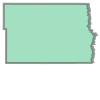

In [23]:
map_data.loc[38017, "geometry"]

In [24]:
# this kind of code gives us a nice overview of what the geopandas dataframe is doing and the values it allows 
# and the polygons to be held and to be intepreted. 

We can plot all of the data at once using df.plot(). However, we will want to specify map parameters.

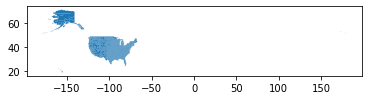

In [25]:
map_data.plot()

In [26]:
#COVID19Map.py
# the hardest thing  is to create this geodata dataframe 
# whenever we try to get our economic dataframe to show at the county level, the magic is this function 
# what we did was for every day we create a dataframe taht only has those datas we transform that in the geodataframe 
# we stack all of those 
def create_covid_geo_dataframe(covid_data, map_data, dates):
    # create geopandas dataframe with multiindex for date
    # original geopandas dataframe had no dates, so copies of the df are 
    # stacked vertically, with a new copy for each date in the covid_data index
    #(dates is a global)
     # cycle through the dates
    i = 0
    for date in dates:
        # select county observations from each date in dates
        # for each data, we create a dataframe of covid data for just that data
         # take limited set of the fips codes from the covid data even though they have the same column fips code 
        # select county observations from each date in dates
        
        df = covid_data[covid_data.index.get_level_values("date")==date]
        # use the fips_codes from the slice of covid_data to select counties
        # from the map_data index,making sure that the map_data index matches
        # the covid_data index
        # identify the fips associated with that data 
        
        counties = df.index.get_level_values("fips_code")
        # call a slice of the geodataframe that includes the counties 
        # that are in covid_data
        # pass the data with the same index 
        agg_df = map_data.loc[counties]
        # each row should reflect the date so that it is aligned 
        # with covid_data
        agg_df["date"] = date
        
        # we set the data for the geodata frame to be the data that we draw from the loop 
        if i == 0: # create the initial dataframe 
            # create the geodataframe, select coordinate system (.crs) to
            # match map_data.crs
            
            # when making the initial dataframe and call this geodataframe 
            # using the same coordinate system here, that is what CRS is to use the same coordinate system to make sure it matches. 
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            i += 1
        else:
            # after initial geodataframe is created, stack a dataframe for
            # each date in dates. Once completed, index of matching_gpd
            # will match index of covid_data
            
            # we append every data and make our initial dataframe for January 22 and then get to January 23 and stack the dataframes 
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)    
            
    # Set mathcing_gpd index as["fips_code", "date"], liked covid_data index
    # set the index so that it is a multiindex with county and data 
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code","date"], inplace = True)
    # add each column from covid_data to mathcing_gpd
    for key, val in covid_data.items():
        matching_gpd[key] = val
    return matching_gpd       

# . . . to end of script . . .
# dates will be used to create a geopandas DataFrame with multiindex 
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_covid_geo_dataframe(covid_data, map_data, dates)

In [27]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID        NAME  \
fips_code date                                                                 
1001      2020-01-22        1      001  00161526  0500000US01001     Autauga   
1003      2020-01-22        1      003  00161527  0500000US01003     Baldwin   
1005      2020-01-22        1      005  00161528  0500000US01005     Barbour   
1007      2020-01-22        1      007  00161529  0500000US01007        Bibb   
1009      2020-01-22        1      009  00161530  0500000US01009      Blount   
...                       ...      ...       ...             ...         ...   
56037     2020-11-13       56      037  01609192  0500000US56037  Sweetwater   
56039     2020-11-13       56      039  01605083  0500000US56039       Teton   
56041     2020-11-13       56      041  01605084  0500000US56041       Uinta   
56043     2020-11-13       56      043  01605085  0500000US56043    Washakie   
56045     2020-11-13       56      045  01605086  0500000US56045      Weston   

                     LSAD        ALAND      AWATER  Population    state  ...  \
fips_code date                                                           ...   
1001      2020-01-22   06   1539602123    25706961     55869.0  Alabama  ...   
1003      2020-01-22   06   4117546676  1133055836    223234.0  Alabama  ...   
1005      2020-01-22   06   2292144655    50538698     24686.0  Alabama  ...   
1007      2020-01-22   06   1612167481     9602089     22394.0  Alabama  ...   
1009      2020-01-22   06   1670103911    15015423     57826.0  Alabama  ...   
...                   ...          ...         ...         ...      ...  ...   
56037     2020-11-13   06  27005754244   166230251     42343.0  Wyoming  ...   
56039     2020-11-13   06  10351784301   570864879     23464.0  Wyoming  ...   
56041     2020-11-13   06   5391631764    16625817     20226.0  Wyoming  ...   
56043     2020-11-13   06   5798138762    10429604      7805.0  Wyoming  ...   
56045     2020-11-13   06   6210804116     5225499      6927.0  Wyoming  ...   

                     cumulative_deaths  cumulative_deaths_per_100_000  \
fips_code date                                                          
1001      2020-01-22                 0                           0.00   
1003      2020-01-22                 0                           0.00   
1005      2020-01-22                 0                           0.00   
1007      2020-01-22                 0                           0.00   
1009      2020-01-22                 0                           0.00   
...                                ...                            ...   
56037     2020-11-13                 4                           9.07   
56039     2020-11-13                 2                           8.67   
56041     2020-11-13                 4                          19.41   
56043     2020-11-13                 7                          86.11   
56045     2020-11-13                 0                           0.00   

                     new_cases new_deaths  new_cases_per_100_000  \
fips_code date                                                     
1001      2020-01-22       NaN        NaN                    NaN   
1003      2020-01-22       NaN        NaN                    NaN   
1005      2020-01-22       NaN        NaN                    NaN   
1007      2020-01-22       NaN        NaN                    NaN   
1009      2020-01-22       NaN        NaN                    NaN   
...                        ...        ...                    ...   
56037     2020-11-13      47.0        0.0                 106.53   
56039     2020-11-13      42.0        0.0                 182.14   
56041     2020-11-13      22.0        0.0                 106.75   
56043     2020-11-13       3.0        0.0                  36.90   
56045     2020-11-13       9.0        0.0                 126.76   

                      new_deaths_per_100_000  new_cases_7_day_rolling_avg  \
fips_code date              

In [28]:
# i = 0 to initial dataframe and could call something else, call it false 
# dataframe initialized or something like that and then switch it true once the dataframes initialized, but it also workds 

In [29]:
def create_covid_geo_dataframe(covid_data, map_data, dates):
    data_frame_initialized = False
    for date in dates:
        # pass the dates to this function 
        # the nice thing about this is that this is going to be automated
        # like we import the covid data and it has these dates, and we use the dates to have the latest update 
        df = covid_data[covid_data.index.get_level_values("date")==date]
        # we cycle through the dates that we took from the dataframe we begin with 
        # select only the data that reflexts that date 
        
        # next is to gather the counties 
        # we took data from particular day from the covid data, we are are taking the data from the counties in covin data 
        counties = df.index.get_level_values("fips_code") 
           
        # match your counties to the covin data and if your counties do not match the covid data, then get rid of the counties that are not 
        # in the covin data 
        agg_df = map_data.loc[counties]
        agg_df["date"] = date
        
        if data_frame_initialized == False           : # create the dataframe 
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True
        else:  # stack the dataframe that was initialized 
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)    
            
# Set mathcing_gpd index as["fips_code", "date"], liked covid_data index
    # set the index so that it is a multiindex with county and data 
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code","date"], inplace = True)
    # add each column from covid_data to mathcing_gpd
    for key, val in covid_data.items():
        matching_gpd[key] = val
    return matching_gpd  


# we need to combine two dataframes but the map data does not have all the dates that the covid data has 
# but the map data and the covid data are close to match 

# . . . to end of script . . .
# dates will be used to create a geopandas DataFrame with multiindex 

# nest three functions 
# there is date for every county and so we got all the data entries and get rid of duplicates 
# turn back to a list and we can sort it which is the minimum of the dates 
dates = sorted(list(set(covid_data.index.get_level_values("date"))))

# use our function, geo dataframe and pass the covid data, the mapdata and the sets of dates 
covid_data = create_covid_geo_dataframe(covid_data, map_data, dates)
            

In [30]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID        NAME  \
fips_code date                                                                 
1001      2020-01-22        1      001  00161526  0500000US01001     Autauga   
1003      2020-01-22        1      003  00161527  0500000US01003     Baldwin   
1005      2020-01-22        1      005  00161528  0500000US01005     Barbour   
1007      2020-01-22        1      007  00161529  0500000US01007        Bibb   
1009      2020-01-22        1      009  00161530  0500000US01009      Blount   
...                       ...      ...       ...             ...         ...   
56037     2020-11-13       56      037  01609192  0500000US56037  Sweetwater   
56039     2020-11-13       56      039  01605083  0500000US56039       Teton   
56041     2020-11-13       56      041  01605084  0500000US56041       Uinta   
56043     2020-11-13       56      043  01605085  0500000US56043    Washakie   
56045     2020-11-13       56      045  01605086  0500000US56045      Weston   

                     LSAD        ALAND      AWATER  Population    state  ...  \
fips_code date                                                           ...   
1001      2020-01-22   06   1539602123    25706961     55869.0  Alabama  ...   
1003      2020-01-22   06   4117546676  1133055836    223234.0  Alabama  ...   
1005      2020-01-22   06   2292144655    50538698     24686.0  Alabama  ...   
1007      2020-01-22   06   1612167481     9602089     22394.0  Alabama  ...   
1009      2020-01-22   06   1670103911    15015423     57826.0  Alabama  ...   
...                   ...          ...         ...         ...      ...  ...   
56037     2020-11-13   06  27005754244   166230251     42343.0  Wyoming  ...   
56039     2020-11-13   06  10351784301   570864879     23464.0  Wyoming  ...   
56041     2020-11-13   06   5391631764    16625817     20226.0  Wyoming  ...   
56043     2020-11-13   06   5798138762    10429604      7805.0  Wyoming  ...   
56045     2020-11-13   06   6210804116     5225499      6927.0  Wyoming  ...   

                     cumulative_deaths  cumulative_deaths_per_100_000  \
fips_code date                                                          
1001      2020-01-22                 0                           0.00   
1003      2020-01-22                 0                           0.00   
1005      2020-01-22                 0                           0.00   
1007      2020-01-22                 0                           0.00   
1009      2020-01-22                 0                           0.00   
...                                ...                            ...   
56037     2020-11-13                 4                           9.07   
56039     2020-11-13                 2                           8.67   
56041     2020-11-13                 4                          19.41   
56043     2020-11-13                 7                          86.11   
56045     2020-11-13                 0                           0.00   

                     new_cases new_deaths  new_cases_per_100_000  \
fips_code date                                                     
1001      2020-01-22       NaN        NaN                    NaN   
1003      2020-01-22       NaN        NaN                    NaN   
1005      2020-01-22       NaN        NaN                    NaN   
1007      2020-01-22       NaN        NaN                    NaN   
1009      2020-01-22       NaN        NaN                    NaN   
...                        ...        ...                    ...   
56037     2020-11-13      47.0        0.0                 106.53   
56039     2020-11-13      42.0        0.0                 182.14   
56041     2020-11-13      22.0        0.0                 106.75   
56043     2020-11-13       3.0        0.0                  36.90   
56045     2020-11-13       9.0        0.0                 126.76   

                      new_deaths_per_100_000  new_cases_7_day_rolling_avg  \
fips_code date              

In [31]:
def create_new_vars(covid_data, moving_average_days):
    # use a for loop that performs the same operations for cases and deaths
    for key in ("cases", "deaths"):
        # capitilize the key 
        cap_key = key.title()
        
        # create the cases and deaths per million by drawing from the cumulative cases and dividing by total population 
        # when we say hundred thousand or per million, we mean per person times a million 
        # we are drawing fromm the covid data column, cumulative cases or cumulative deaths
        covid_data[cap_key + " per Million"] = covid_data["cumulative_" + key]\
            .div(covid_data["total_population"]).mul(10**6)
        # .groupby("fips_code")
        # the difference which is the difference between the current observarions and previous observations 
        # the magic thing is that this is telling us how many new cases we have every day or how many new deaths every day 
        covid_data["Daily " + cap_key + " per Million"] =\
            covid_data["cumulative_"+key].groupby(covid_data.index.names[0])\
            .diff(1).div(covid_data["total_population"]).mul(10**6)
        covid_data["Daily " + cap_key + " per Million MA"] = covid_data["Daily " +\
                cap_key + " per Million"].rolling(moving_average_days).mean()        

moving_average_days = 7
create_new_vars(covid_data, moving_average_days)

In [32]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID        NAME  \
fips_code date                                                                 
1001      2020-01-22        1      001  00161526  0500000US01001     Autauga   
1003      2020-01-22        1      003  00161527  0500000US01003     Baldwin   
1005      2020-01-22        1      005  00161528  0500000US01005     Barbour   
1007      2020-01-22        1      007  00161529  0500000US01007        Bibb   
1009      2020-01-22        1      009  00161530  0500000US01009      Blount   
...                       ...      ...       ...             ...         ...   
56037     2020-11-13       56      037  01609192  0500000US56037  Sweetwater   
56039     2020-11-13       56      039  01605083  0500000US56039       Teton   
56041     2020-11-13       56      041  01605084  0500000US56041       Uinta   
56043     2020-11-13       56      043  01605085  0500000US56043    Washakie   
56045     2020-11-13       56      045  01605086  0500000US56045      Weston   

                     LSAD        ALAND      AWATER  Population    state  ...  \
fips_code date                                                           ...   
1001      2020-01-22   06   1539602123    25706961     55869.0  Alabama  ...   
1003      2020-01-22   06   4117546676  1133055836    223234.0  Alabama  ...   
1005      2020-01-22   06   2292144655    50538698     24686.0  Alabama  ...   
1007      2020-01-22   06   1612167481     9602089     22394.0  Alabama  ...   
1009      2020-01-22   06   1670103911    15015423     57826.0  Alabama  ...   
...                   ...          ...         ...         ...      ...  ...   
56037     2020-11-13   06  27005754244   166230251     42343.0  Wyoming  ...   
56039     2020-11-13   06  10351784301   570864879     23464.0  Wyoming  ...   
56041     2020-11-13   06   5391631764    16625817     20226.0  Wyoming  ...   
56043     2020-11-13   06   5798138762    10429604      7805.0  Wyoming  ...   
56045     2020-11-13   06   6210804116     5225499      6927.0  Wyoming  ...   

                     new_cases_7_day_rolling_avg  \
fips_code date                                     
1001      2020-01-22                         NaN   
1003      2020-01-22                         NaN   
1005      2020-01-22                         NaN   
1007      2020-01-22                         NaN   
1009      2020-01-22                         NaN   
...                                          ...   
56037     2020-11-13                       44.29   
56039     2020-11-13                       26.57   
56041     2020-11-13                       20.57   
56043     2020-11-13                        3.50   
56045     2020-11-13                        6.33   

                      new_deaths_7_day_rolling_avg state_abr        Location  \
fips_code date                                                                 
1001      2020-01-22                           NaN        AL     Autauga, AL   
1003      2020-01-22                           NaN        AL     Baldwin, AL   
1005      2020-01-22                           NaN        AL     Barbour, AL   
1007      2020-01-22                           NaN        AL        Bibb, AL   
1009      2020-01-22                           NaN        AL      Blount, AL   
...                                            ...       ...             ...   
56037     2020-11-13                          0.00        WY  Sweetwater, WY   
56039     2020-11-13                          0.00        WY       Teton, WY   
56041     2020-11-13                          0.14        WY       Uinta, WY   
56043     2020-11-13                          0.00        WY    Washakie, WY   
56045     2020-11-13                          0.00        WY      Weston, WY   

                      Cases per Million  Daily Cases per Million  \
fips_code date                                                     
1001      2020-01-22           0.000000                      NaN   
1003      2020-01-

In [33]:
# https://www.worldometers.info/coronavirus/country/us/

In [34]:
# we create the new variables and deaths in cases per million, we use the for loop, so that we can just make one set of code for each of the variables 
# we take the toal deaths divide by the population and expressed as a percentage. 

Text(0.5, 1.0, '2020-11-13\nCOVID-19 in the U.S.')

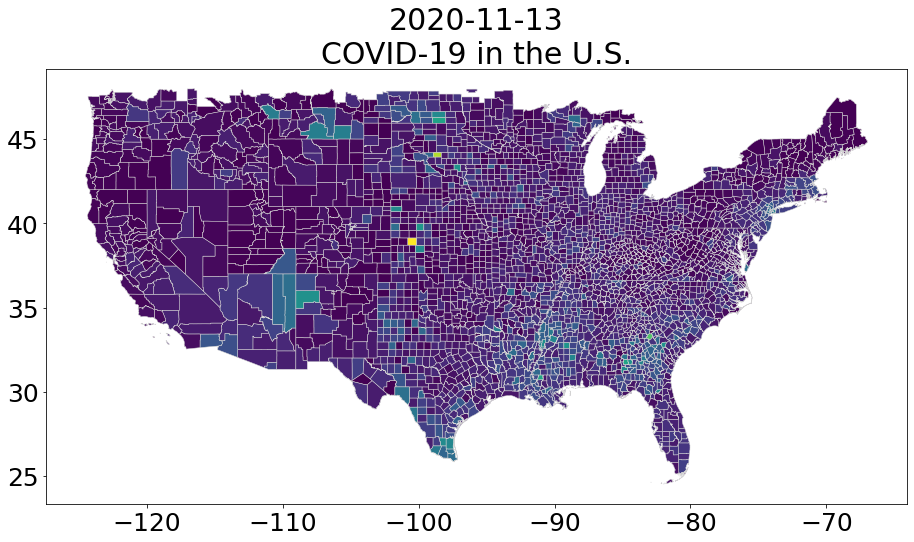

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
#COVID19Map.py
# only include observations within these boundaries
# this will shrink the size of the map
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    # select data by longitude and latitude 
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

# . . . to end of script
# choose the date here as the last date

date = dates[-1]

# choose map bounds
# create this variable map 
if "map_bounded" not in locals():
    # define all the boundary coordinates 
    minx = -127
    miny = 23
    maxx = -66
    maxy = 48
    # we call the function and redefine the data we already created 
    # we end up with this and we say within those bounds, return a dataframe 
    covid_data = select_data_within_bounds(covid_data, minx, miny, maxx, maxy)
    # set the boundary true 
    map_bounded = True
    
    
    # plot the data frame
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})

# It stems from practice of having your configs executable - they are automatically Run at startup and they Configure your stuff.
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_data[covid_data.index.get_level_values("date") == date]
df.plot(ax=ax, cax = ax, column=key, linewidth=.5, 
             edgecolor='lightgrey')
ax.set_title(str(date) + "\n" + "COVID-19 in the U.S.", fontsize = 30)

Text(0.5, 1.0, '2020-11-13\nCOVID-19 in the U.S.')

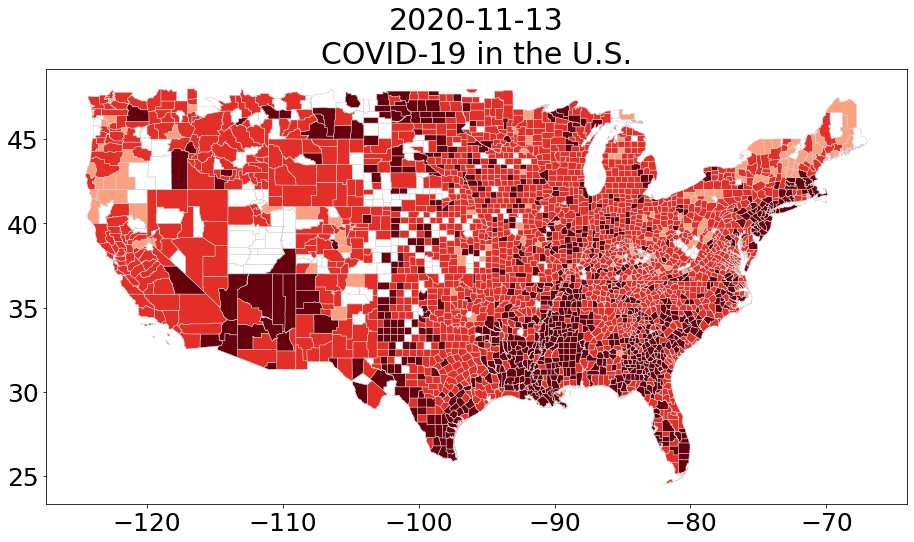

In [36]:
#COVID19Map.py
# . . . to end of script
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
# change colors, divide into 4 distinct colors
cmap = cm.get_cmap('Reds', 4)
vmin = 1 
vmax = df[key].max()

norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)
df = covid_data[covid_data.index.get_level_values("date") == date]
df.plot(ax=ax, cax = ax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
             norm = norm)

ax.set_title(str(date) + "\n" + "COVID-19 in the U.S.", fontsize = 30)

Text(0.5, 1.0, '2020-11-13\nCOVID-19 in the U.S.')

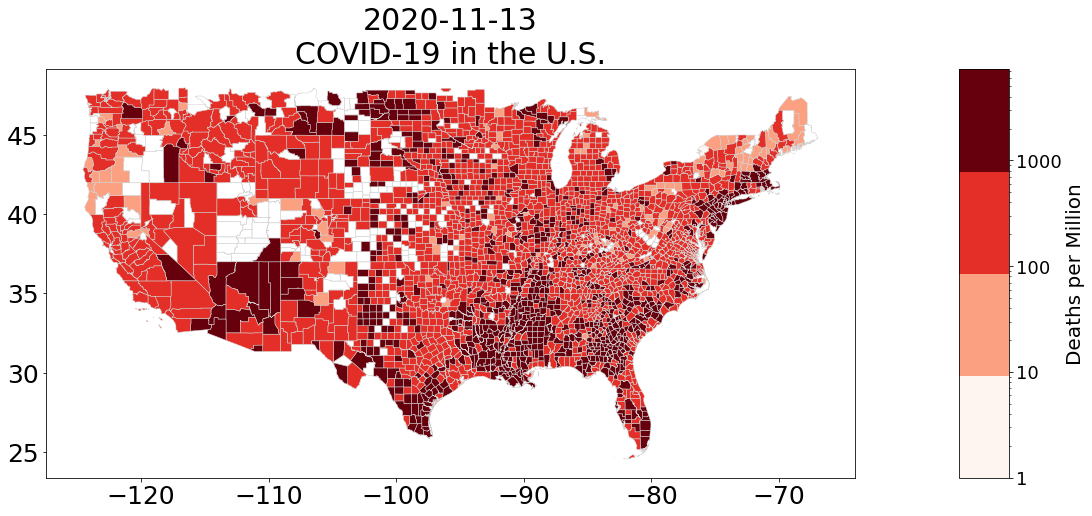

In [37]:
fig, ax = plt.subplots(figsize=(19,9),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
# change colors, divide into 4 distinct colors
cmap = cm.get_cmap('Reds', 4)
vmin = 1 
vmax = df[key].max()

############## Add Colorbar ################
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# empty array for the data range
sm._A = []
# prepare space for colorbar
divider = make_axes_locatable(ax)
size = "5%" 
cax = divider.append_axes("right", size = size, pad = 0.1)
# add colorbar to figure
cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
cbar.ax.tick_params(labelsize=18)
vals = list(cbar.ax.get_yticks())
vals.append(vmax)
# format colorbar values as int
cbar.ax.set_yticklabels([int(x) for x in vals])
cbar.ax.set_ylabel(key, fontsize = 20)


df.plot(ax=ax, cax = ax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
             norm = norm)
ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.", fontsize = 30)

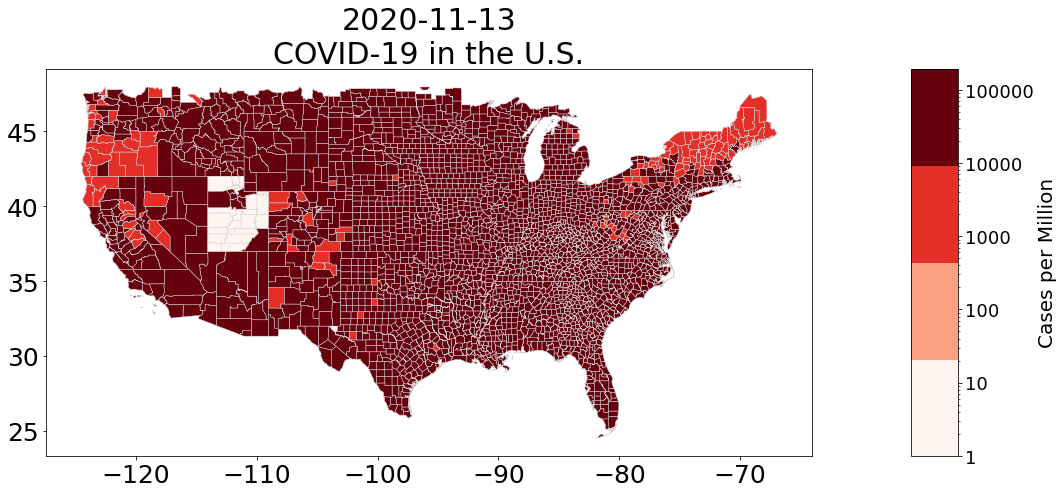

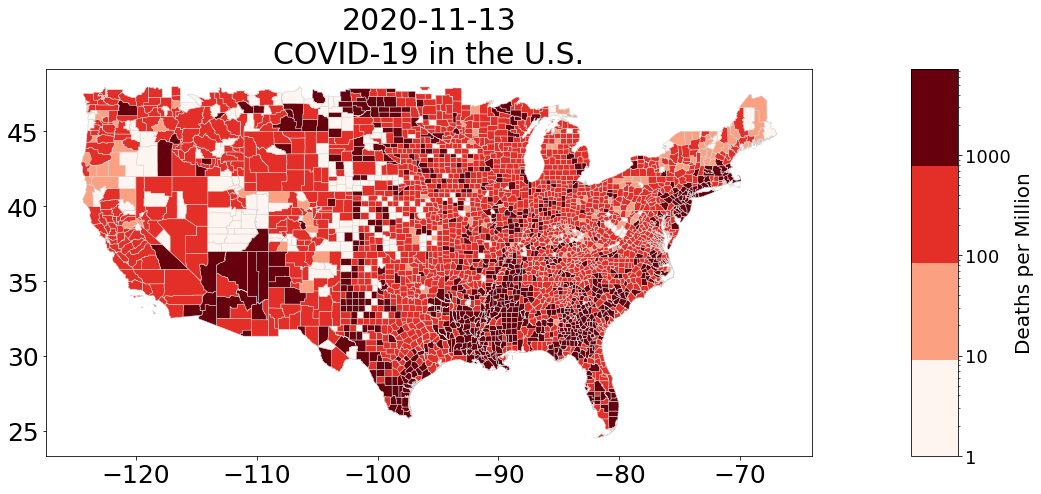

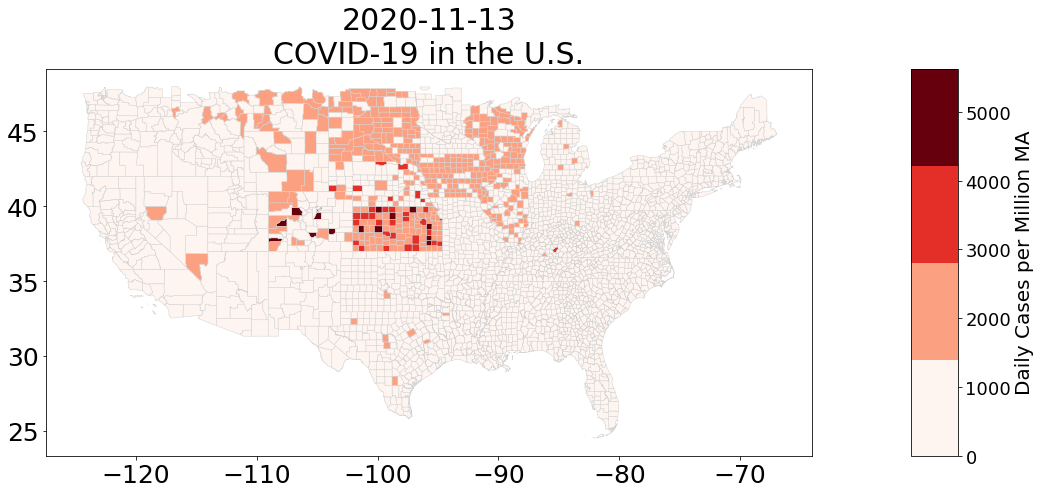

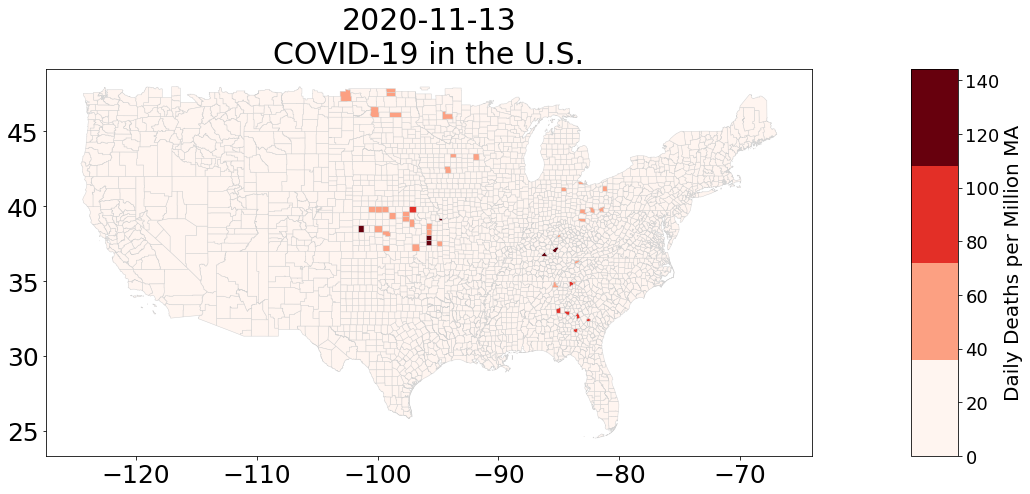

In [38]:
keys = ["Cases per Million", "Deaths per Million", 
        "Daily Cases per Million MA", "Daily Deaths per Million MA"]
for key in keys:
    # identify whether or not to log values for color axis
    # if daily rates, do not log. Only log totals.
    log = False if "Daily" in key else True
    fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
    plt.rcParams.update({"font.size": 30})
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    # this time we replace 0 values with 1
    # so that these values show up as beige instead of as white
    # when color axis is logged
    df = covid_data[covid_data.index.get_level_values("date")==date].replace(0,1)
    # set range of colorbar
    vmin = 1 if log else 0 
    vmax = df[key].max()
    # choose colormap
    cmap = cm.get_cmap('Reds', 4)
    # format colormap
    if log:
        norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
    else:
        norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # empty array for the data range
    sm._A = []
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%" 
    cax = divider.append_axes("right", size = size, pad = 0.1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)

    # format colorbar values as int
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize = 20)


    df.plot(ax=ax, cax = cax, column=key, vmin=vmin ,vmax = vmax, 
                 cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
                 norm = norm)
    ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.", fontsize = 30)

    plt.show()
    plt.close()


In [39]:
# import the data from the data dot world and the geo data as well, the geo data is map data. 
# so every entry has a geometry does geometies are made up of a bunch of numbers,and that is why we have to install all those shapely so that 
# python could interpret these appropriately and create these shapes. 
# the hardestt thing is to create the covid-data frame 
# whenever we try to get our economic dataframe to show at the county level, the magic is this function 
# what we did was for every day we create a dataframe taht only has those datas we transform that in the geodataframe 
# we stack all of those 
# we want every county represented on a map and so we are going to take the map dataframe and for every data
# merge it with the data from the covid data and we are going to take every dates like that and stack one after another 

Text(0.5, 1.0, '2020-11-13\nCOVID-19 in the U.S.')

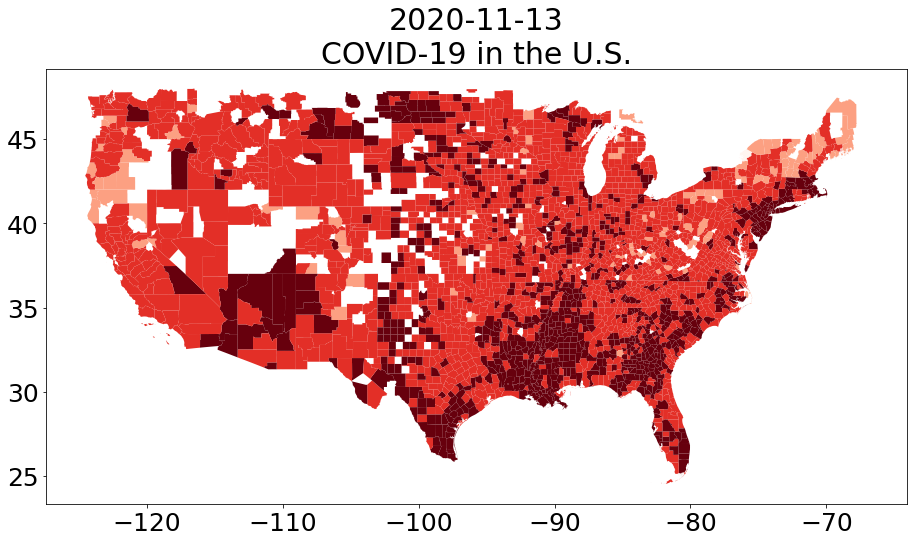

In [40]:
#COVID19Map.py
# . . . to end of script
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
# create the cmap 
# change colors, divide into 4 distinct colors
cmap = cm.get_cmap('Reds', 4)
vmin = 1 
vmax = df[key].max()

# norm defines the range of the logged value 
norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
#log choose 1, if it is 0, null value 
# scalarMappable uses that range in the colorbar 
plt.cm.ScalarMappable(cmap=cmap, norm=norm)
df = covid_data[covid_data.index.get_level_values("date") == date]
df.plot(ax=ax, cax = ax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, 
             norm = norm)

ax.set_title(str(date) + "\n" + "COVID-19 in the U.S.", fontsize = 30)

In [41]:
# matplotlib choosing colors 
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [42]:
# how do we get all of the data 

Text(0.5, 1.0, '2020-11-13\nCOVID-19 in the U.S.')

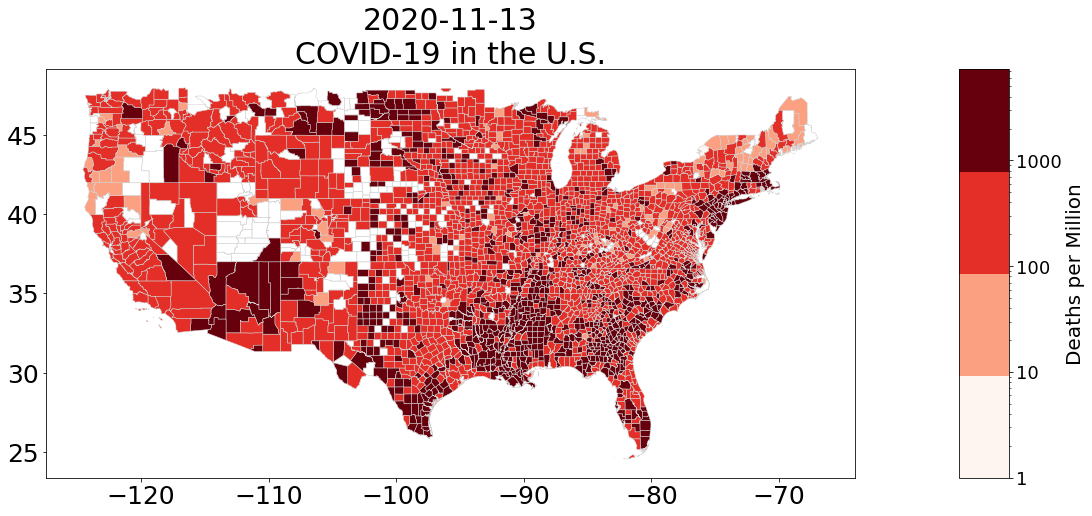

In [43]:
# the template of making a map 
fig, ax = plt.subplots(figsize=(19,9),
                      subplot_kw = {"aspect":"equal"})
plt.rcParams.update({"font.size": 30})

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_data[covid_data.index.get_level_values("date") == date]
cmap = cm.get_cmap("Reds", 4)
vmin = 1
vmax = df[key].max()
norm = cm.colors.LogNorm(vmin=vmin, vmax=vmax)

### add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# empty array for the data range
sm.A = []
# prepare space for colorbar
# this is the key command for initiating for where we are going to put the color bar 
divider = make_axes_locatable(ax)
size = "5%"
cax = divider.append_axes("right", size = size, pad = .1)
# add colorbar to figure
cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
cbar.ax.tick_params(labelsize=18)
vals = list(cbar.ax.get_yticks())
vals.append(vmax)
cbar.ax.set_yticklabels([int(x) for x in vals])
cbar.ax.set_ylabel(key, fontsize=20)


df.plot(ax=ax, cax=ax, column = key, vmin=vmin, vmax=vmax,
       cmap=cmap, legend=False, linewidth = .5, 
        edgecolor="lightgrey",norm=norm)
ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.",
             fontsize = 30)

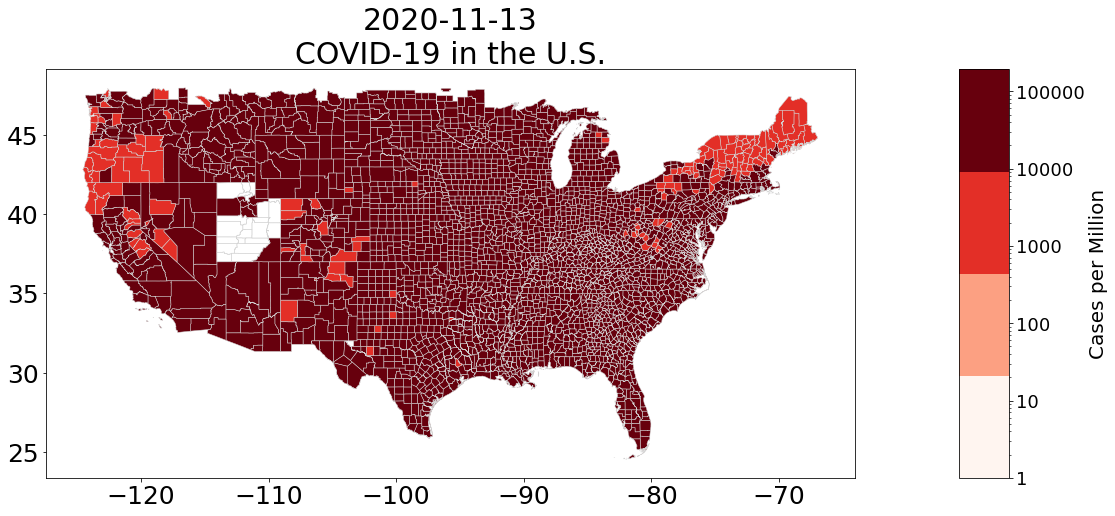

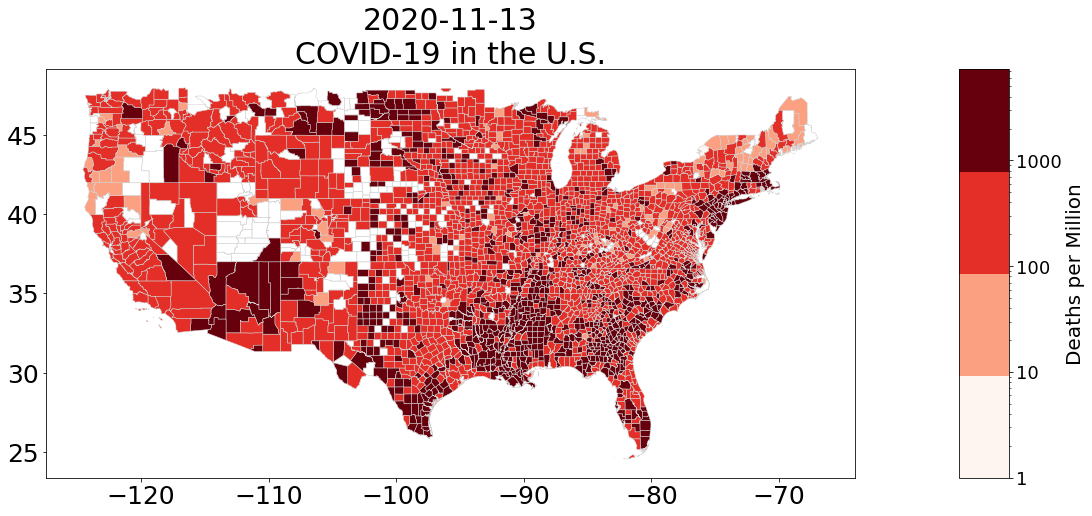

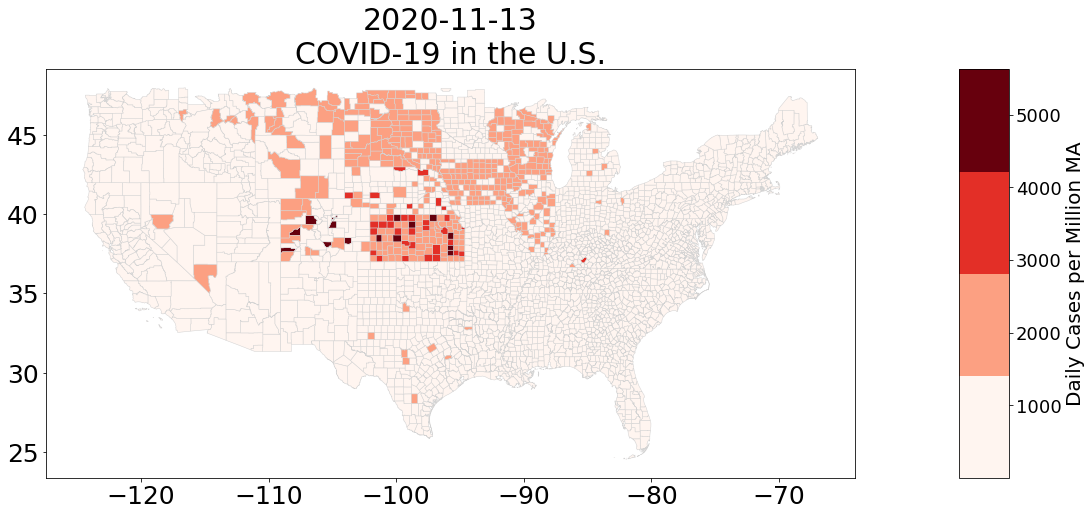

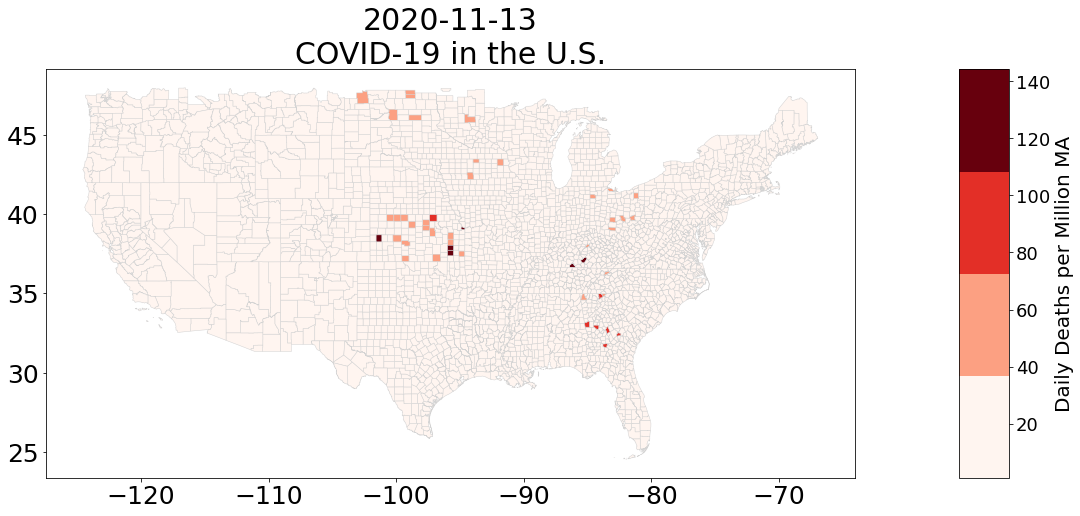

In [44]:
# plotting for the four variables after setting up for each variable 
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

keys = ["Cases per Million", "Deaths per Million",
       "Daily Cases per Million MA", "Daily Deaths per Million MA"]

for key in keys:
    log = False if "Daily" in key else True
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    df = covid_data[covid_data.index.get_level_values("date") == date]
    cmap = cm.get_cmap("Reds", 4)
    vmin = 1
    vmax = df[key].max()
    if log:
        norm = cm.colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    ### add colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # empty array for the data range
    sm.A = []
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize=20)

    df.plot(ax=ax, cax=ax, column = key, vmin=vmin, vmax=vmax,
           cmap=cmap, legend=False, linewidth = .5, 
            edgecolor="lightgrey",norm=norm)
    ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.",
                 fontsize = 30)
    plt.show()
    plt.close()

In [54]:
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages

# create empty pdf
pp = PdfPages("COVID-19Maps.pdf")

keys = ["Cases per Million", "Deaths per Million",
       "Daily Cases per Million MA", "Daily Deaths per Million MA"]

data = covid_data.groupby("date").mean().index
# only include every 7th day,
# not required
dates = [date for date in dates if "15" in date]
for key in keys:
    vmin = 1
    vmax = df[key].max()

    for date in dates:
        log = False if "Daily" in key else True
        fig, ax = plt.subplots(figsize=(19,9),
                              subplot_kw = {"aspect":"equal"})
        plt.rcParams.update({"font.size": 30})

        plt.xticks(fontsize = 25)
        plt.yticks(fontsize = 25)
        df = covid_data[
            covid_data.index.get_level_values("date") == date]
        cmap = cm.get_cmap("Reds", 4)
        if log:
            norm = cm.colors.LogNorm(vmin=vmin, vmax=vmax)
        else:
            norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
        ### add colorbar
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        # empty array for the data range
        sm.A = []
        # prepare space for colorbar
        divider = make_axes_locatable(ax)
        size = "5%"
        cax = divider.append_axes("right", size = size, pad = .1)
        # add colorbar to figure
        cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
        cbar.ax.tick_params(labelsize=18)
        vals = list(cbar.ax.get_yticks())
        vals.append(vmax)
        cbar.ax.set_yticklabels([int(x) for x in vals])
        cbar.ax.set_ylabel(key, fontsize=20)

        df.plot(ax=ax, cax=ax, column = key, vmin=vmin, vmax=vmax,
               cmap=cmap, legend=False, linewidth = .5, 
                edgecolor="lightgrey",norm=norm)
        ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.",
                     fontsize = 30)
        plt.show()
        pp.savefig(fig, bbox_inches="tight")
        plt.close()

pp.close()

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import pandas as pd
#import unemployment data
u_data = pd.read_csv(
    "countyUnemploymentData.csv", encoding = "latin1", parse_dates = True)
# drop observations with missing fips codes
index = u_data["fips_code"].dropna(axis = 0).index
u_data = u_data.loc[index]

u_data["fips_code"] = u_data["fips_code"].astype(int)
u_data.set_index(["fips_code", "date"], inplace = True)

In [ ]:
u_data

In [ ]:
# choose the dates
dates = ["Aug-19",
         "Sep-19",
         "Oct-19",
         "Nov-19",
         "Dec-19",
         "Jan-20",
         "Feb-20",
         "Mar-20",
         "Apr-20",
         "May-20",
         "Jun-20",
         "Jul-20",
         "Aug-20",
         "Sep-20"]
u_data = create_merged_geo_dataframe(u_data, map_data, dates)

In [ ]:
u_data

In [ ]:
# choose map bounds
#if "u_map_bounded" not in locals():
minx = -127
miny = 23
maxx = -66
maxy = 50
u_data = select_data_within_bounds(u_data, minx, miny, maxx, maxy)
u_map_bounded = True

In [ ]:
counties = u_data.groupby("fips_code").mean().index

In [ ]:
key = "Unemployment Rate"
# csv saved data as string, transform to float
u_data[key] = u_data[key].astype(float)
# create new pdf
pp = PdfPages("County Unemployment Rate.pdf")
for date in dates:
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)

    vmin = 0
    #vmax = u_data[key].fillna(0).max()
    vmax = 20
    cmap = cm.get_cmap("Reds", 8)
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    ### add colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # empty array for the data range
    sm.A = []
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize=20)

    # select data only from date
    df = u_data[u_data.index.get_level_values("date") == date]#.dropna(axis=0)
    df.plot(ax=ax, cax=ax, column = key,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .5, edgecolor="lightgrey",norm=norm)
    ax.set_title(date.replace("-", " 20"))
    plt.show()
    pp.savefig(fig, bbox_inches = "tight")
    plt.close()
    
# close your pdf
pp.close()

In [ ]:
# Normalize Unemployment Feb-20 == 1
key = "Unemployment Rate"
# df.copy() makes a copy of the dataframe
n_u_data = u_data.copy()
# go through data for every county for the key and divide the value by the value of the key
# at the date that you would to normalize to 1
#for county in counties:
#    n_u_data[key][county] = n_u_data.loc[county, key].div(n_u_data.loc[county, "Feb-20"][key])
# take the difference between the observed rate and the Feb rate
for county in counties:
    n_u_data[key][county] = n_u_data.loc[county, key].sub(n_u_data.loc[county, "Feb-20"][key])

In [ ]:
pp = PdfPages("Normalized County Unemployment Rate.pdf")

for date in dates:
    # accomplishes same outcome as date.replace("-", " 20")
    title_date = date[:-3]+" 20" + date[-2:]
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    # set range color bar values
    vmin = -30# n_u_data["Unemployment Rate"].min()
    vmax = 30
    cmap = cm.get_cmap("coolwarm", 12)
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    ### add colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # empty array for the data range
    sm.A = []
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)
    cbar.ax.set_ylabel("Normalized "+key + "\n(Observed Rate Minus\nRate in Feb 2020)", fontsize=20)
    
    df = n_u_data[n_u_data.index.get_level_values("date") == date]#.dropna(axis=0)
    df.plot(ax=ax, cax=ax, column = key,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .5, edgecolor="lightgrey",norm=norm)
    ax.set_title(title_date)
    plt.show()
    pp.savefig(fig, bbox_inches = "tight")
    plt.close()